In [18]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [19]:
df=pd.read_csv('netflix_titles.csv', encoding= 'unicode_escape')
#loading the data which we will work on

In [20]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason SaldaÃ±a, Gustavo Sorola, ...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


In [21]:
df.info()             #notice the number of non null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [22]:
#checking duplicated values
df[df.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [23]:
df.isnull()          #way of checking null values

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,False,False,False,True,False,False,True,False,False,False,False,False
6230,False,False,False,True,False,False,True,False,False,False,False,False
6231,False,False,False,True,True,True,True,False,True,False,False,False
6232,False,False,False,True,False,False,True,False,False,False,False,False


In [24]:
pd.isnull(df).sum()    #getting the exact number of null values

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [25]:
# drop null values

df.dropna(inplace=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3774 entries, 0 to 6213
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       3774 non-null   int64 
 1   type          3774 non-null   object
 2   title         3774 non-null   object
 3   director      3774 non-null   object
 4   cast          3774 non-null   object
 5   country       3774 non-null   object
 6   date_added    3774 non-null   object
 7   release_year  3774 non-null   int64 
 8   rating        3774 non-null   object
 9   duration      3774 non-null   object
 10  listed_in     3774 non-null   object
 11  description   3774 non-null   object
dtypes: int64(2), object(10)
memory usage: 383.3+ KB


#### Type of releases in netflix

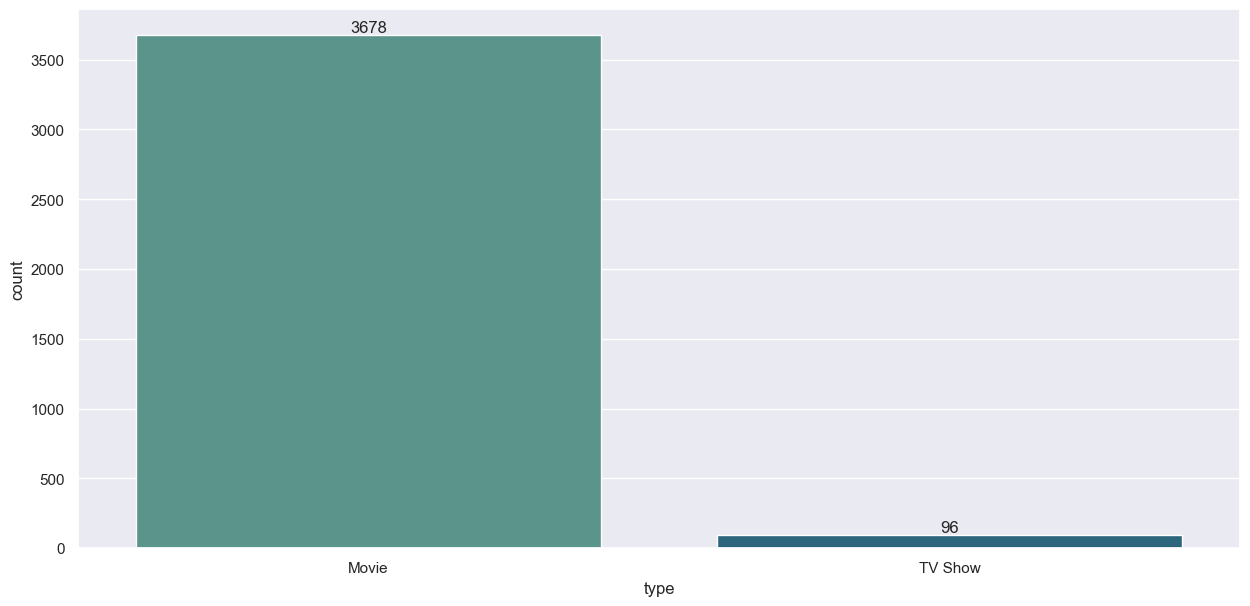

In [61]:
a= sns.countplot(x='type' , data=df , palette='crest')
for bars in a.containers:
    a.bar_label(bars)


#### Count of movies and shows belonging to different Ratings

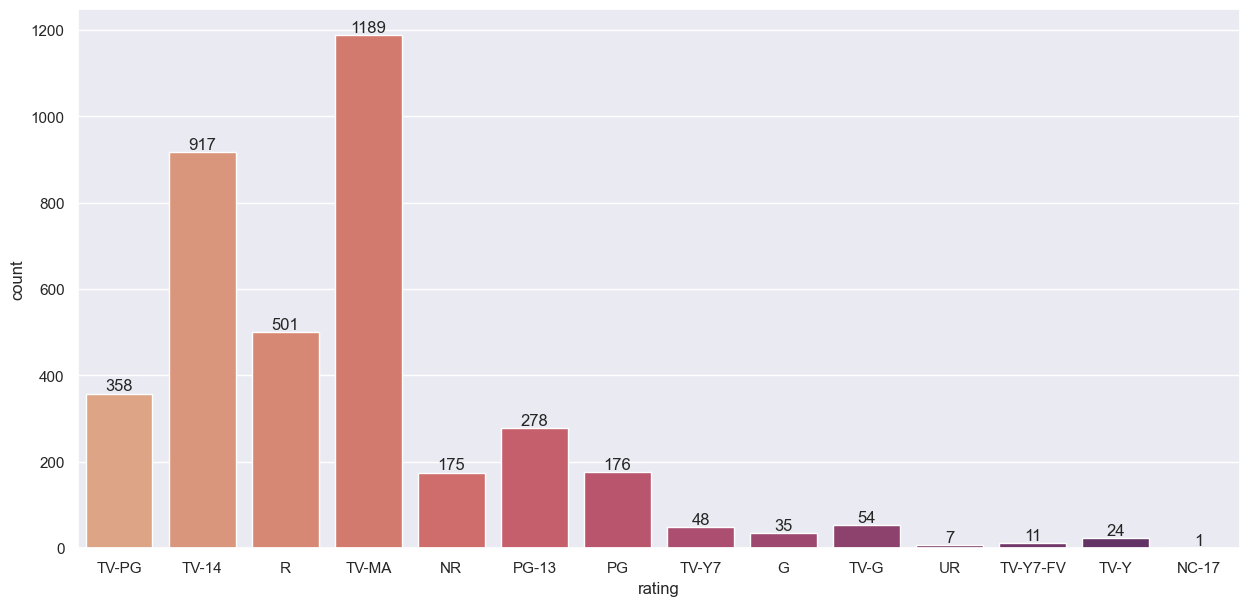

In [10]:
sns.set(rc={'figure.figsize':(15,7)})
b= sns.countplot(x='rating' , data=df , palette='flare')
for bars in b.containers:
    b.bar_label(bars)

In [11]:
df.iloc[3]  #info on film at index 3

show_id                                                  80164077
type                                                        Movie
title                          Fabrizio Copano: Solo pienso en mi
director                          Rodrigo Toro, Francisco Schultz
cast                                              Fabrizio Copano
country                                                     Chile
date_added                                      September 8, 2017
release_year                                                 2017
rating                                                      TV-MA
duration                                                   60 min
listed_in                                         Stand-Up Comedy
description     Fabrizio Copano takes audience participation t...
Name: 7, dtype: object

#### NUMBER OF MOVIES AND TV SHOWS RELEASED AFTER 2010

In [29]:
a =df.loc[df['release_year']>2010, ['release_year','type']]
a

,release_year,type
0,2019,Movie
4,2017,Movie
6,2014,Movie
7,2017,Movie
9,2014,Movie
...,...,...
6142,2019,TV Show
6158,2018,TV Show
6167,2019,TV Show
6182,2019,TV Show


#### Number of movies and TV shows released after 2010

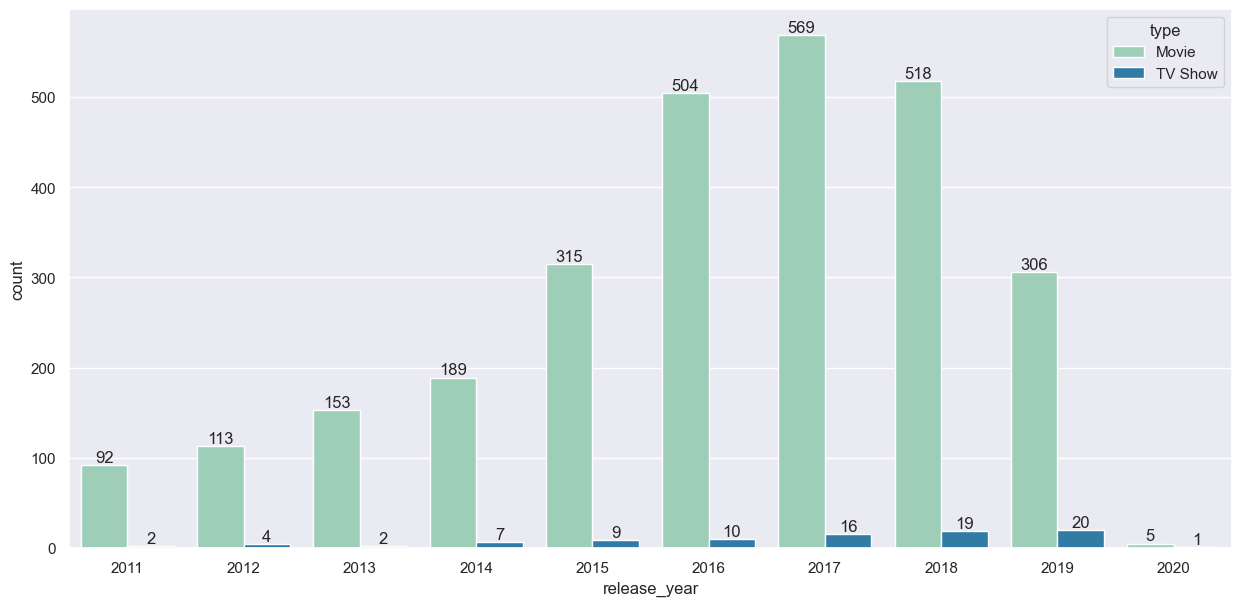

In [30]:
b = sns.countplot(data = a, x = 'release_year', hue = 'type' , palette="YlGnBu")

for bars in b.containers:
    b.bar_label(bars)

In [35]:
# Formating release year
df['date']=pd.to_datetime(df['date_added']
                         )
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019-09-09
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017-09-08
6,70304989,Movie,Automata,Gabe IbÃ¡Ã±ez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f...",2017-09-08
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...,2017-09-08
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden","September 8, 2017",2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...,2017-09-08


#### TOTAL NUMBER OF RELEASES PER YEAR

In [42]:
df['date'].dt.year.value_counts()

2019    1386
2018    1140
2017     805
2016     211
2020     140
2015      50
2014      14
2011      13
2013       7
2012       4
2009       2
2010       1
2008       1
Name: date, dtype: int64

<AxesSubplot: >

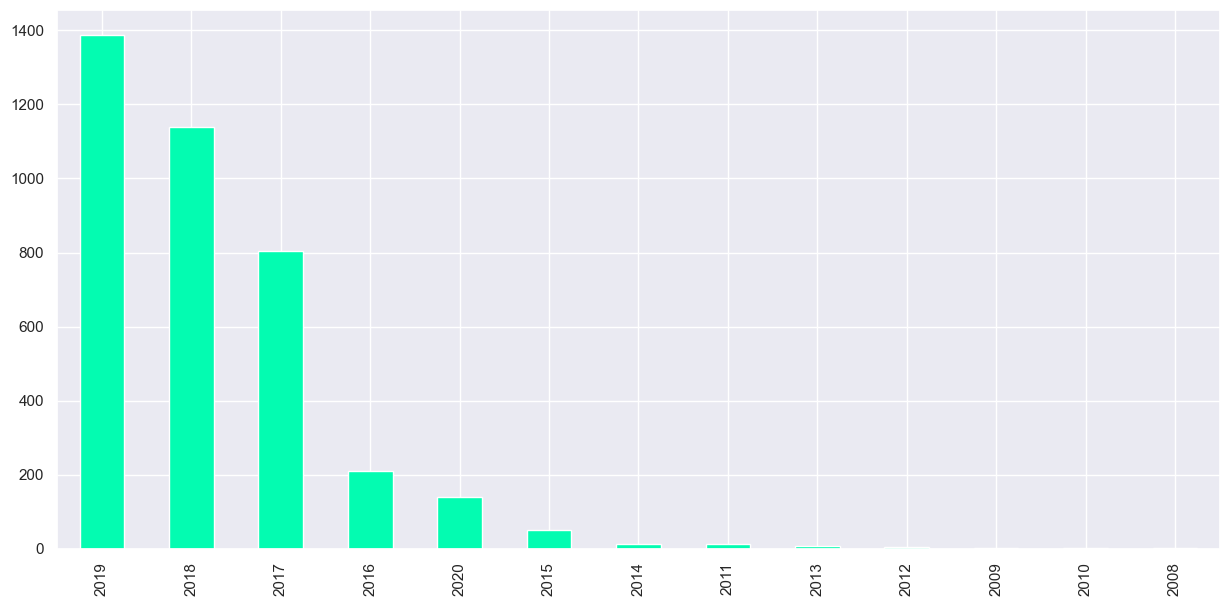

In [43]:
df['date'].dt.year.value_counts().plot(kind='bar',color='#03fcb1')

#### MOVIES RELEASED IN 2016

In [44]:
df[(df['type']=='Movie')&(df['release_year']==2016)].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date
33,80152447,Movie,CÃ©zanne et moi,Daniele Thompson,"Guillaume Canet, Guillaume Gallienne, Alice Po...","Belgium, France","September 7, 2017",2016,R,114 min,"Dramas, Independent Movies, International Movies",This historical drama explores the long and of...,2017-09-07
48,81016045,Movie,One Day,Banjong Pisanthanakun,"Chantavit Dhanasevi, Nittha Jirayungyurn, Thee...",Thailand,"September 5, 2018",2016,TV-PG,135 min,"Dramas, International Movies, Romantic Movies",When his colleague (and crush) temporarily los...,2018-09-05
52,80147760,Movie,Carrie Pilby,Susan Johnson,"Bel Powley, Nathan Lane, Vanessa Bayer, Gabrie...",United States,"September 5, 2017",2016,TV-14,98 min,"Comedies, Dramas",A socially awkward 19-year-old genius makes bi...,2017-09-05
55,81160036,Movie,Saawan,Farhan Alam,"Karam Hussain, Arif Bahlim, Najiba Faiz, Salee...",Pakistan,"September 4, 2019",2016,TV-14,128 min,"Dramas, Independent Movies, International Movies",Outcast from society and left to die in the wi...,2019-09-04
106,81012295,Movie,Weeds on Fire,Chi Fat Chan,"Liu Kai Chi, Lam Yiu-sing, Tony Tsz-Tung Wu, P...",Hong Kong,"September 27, 2018",2016,TV-14,95 min,"Dramas, Independent Movies, International Movies","In 1980s Hong Kong, a school principal forms a...",2018-09-27


#### Titles of all the Movies that were released in India.

In [57]:
df[(df['country']=='India')]['title']

35                 Article 15
37      Ee Nagaraniki Emaindi
41                         PK
58                   Watchman
109                    Malaal
                ...          
5540                   Sairat
5552            Celluloid Man
5557                    Elaan
5562                    Killa
5568                Salaakhen
Name: title, Length: 707, dtype: object

#### Top 5 directors who gave highest number of TV Shows and Movies to Netflix.

In [106]:
a=df['director'].value_counts().head()
a

RaÃºl Campos, Jan Suter    18
Jay Karas                  13
Marcus Raboy               12
Jay Chapman                12
Martin Scorsese             9
Name: director, dtype: int64

<AxesSubplot: ylabel='director'>

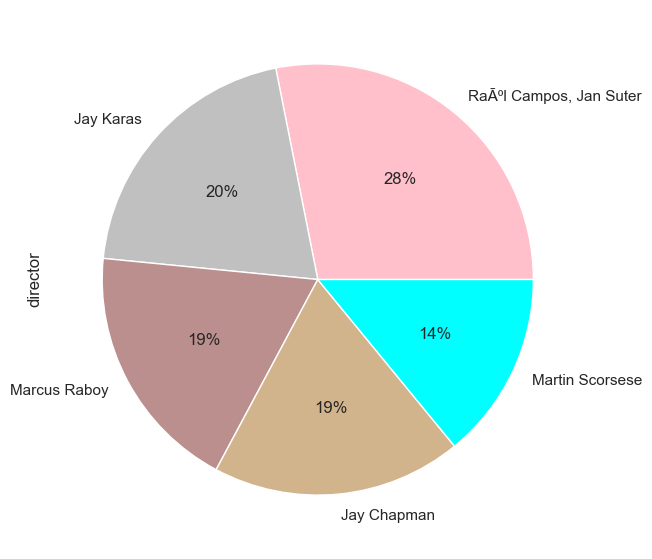

In [115]:
a.plot(kind='pie' , autopct='%1.0f%%' , colors = ['pink', 'silver', 'rosybrown' , 'tan', 'cyan'])

####  All the records where type is Movies and genre is Comedies or Country is India

In [94]:
df[(df['type']=='Movie')&(df['listed_in']=='Comedies')|(df['country']=='Indian')].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017-09-08
141,80059432,Movie,SMOSH: The Movie,Alex Winter,"Ian Hecox, Anthony Padilla, Jenna Marbles, Gra...",United States,"September 22, 2015",2015,PG-13,83 min,Comedies,To keep his teen crush from spotting him in an...,2015-09-22
154,80243600,Movie,Between Two Ferns: The Movie,Scott Aukerman,"Zach Galifianakis, Lauren Lapkus, Ryan Gaul, J...",United States,"September 20, 2019",2019,TV-MA,83 min,Comedies,Armed with awkward questions and zero self-awa...,2019-09-20
191,80987075,Movie,Class Rank,Eric Stoltz,"Olivia Holt, Skyler Gisondo, Kristin Chenoweth...",United States,"September 18, 2018",2018,TV-14,103 min,Comedies,When her class rank threatens her college plan...,2018-09-18
248,80088910,Movie,Natural Born Pranksters,"Roman Atwood, Ben Pluimer","Roman Atwood, Vitaly Zdorovetskiy, Dennis Roady",United States,"September 15, 2016",2016,R,91 min,Comedies,The biggest pranksters on YouTube â Vitalyzd...,2016-09-15


#### TOP 5 MOST RELEASED GENRES

In [95]:
genre=df['listed_in'].value_counts().head()
genre

Dramas, International Movies                        237
Stand-Up Comedy                                     234
Dramas, Independent Movies, International Movies    184
Comedies, Dramas, International Movies              168
Documentaries                                       136
Name: listed_in, dtype: int64

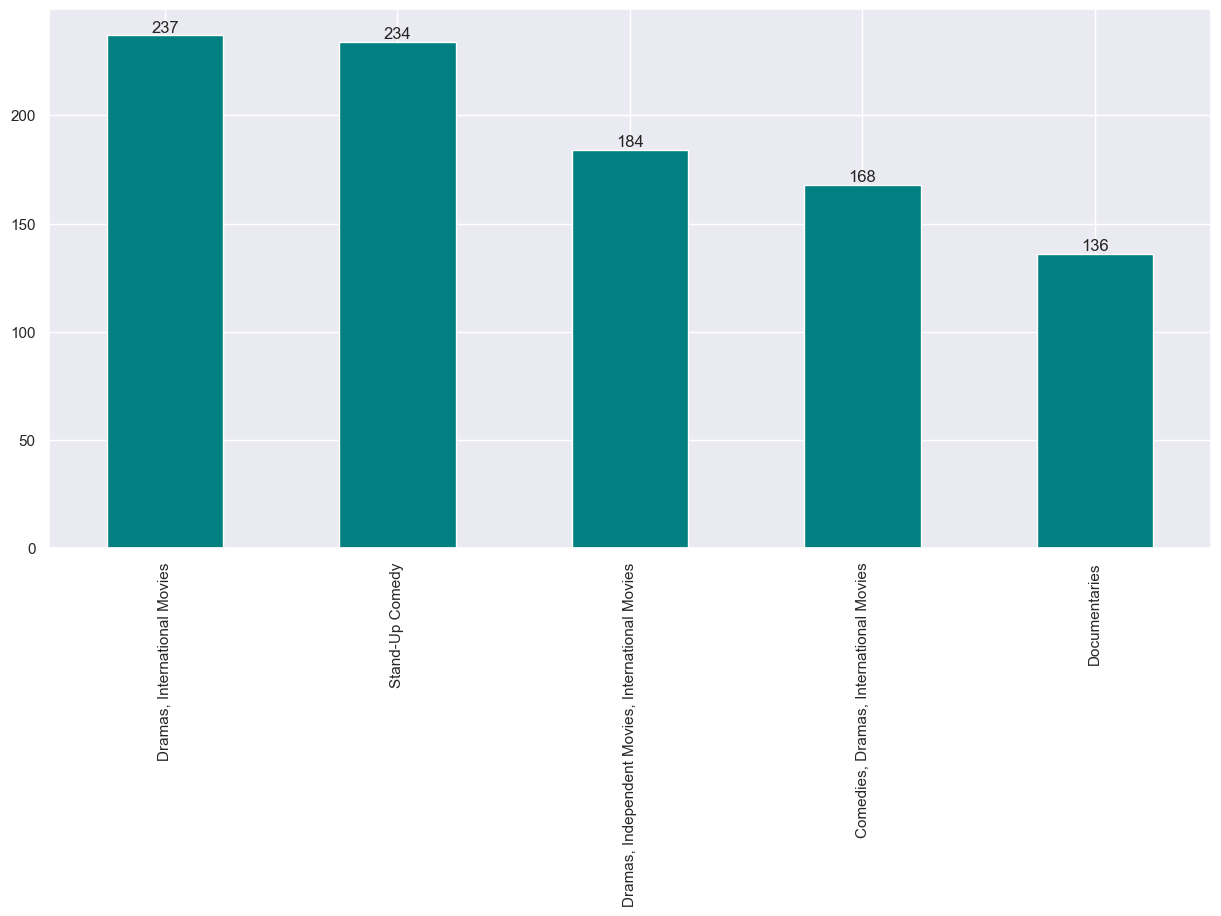

In [116]:
a = genre.plot(kind='bar' , color='teal')
for bars in a.containers:
    a.bar_label(bars)

#### Countries with the highest no. of  Releases

In [122]:
p = df['country'].value_counts().head()
p

United States     1323
India              707
United Kingdom     152
Canada              78
Spain               72
Name: country, dtype: int64

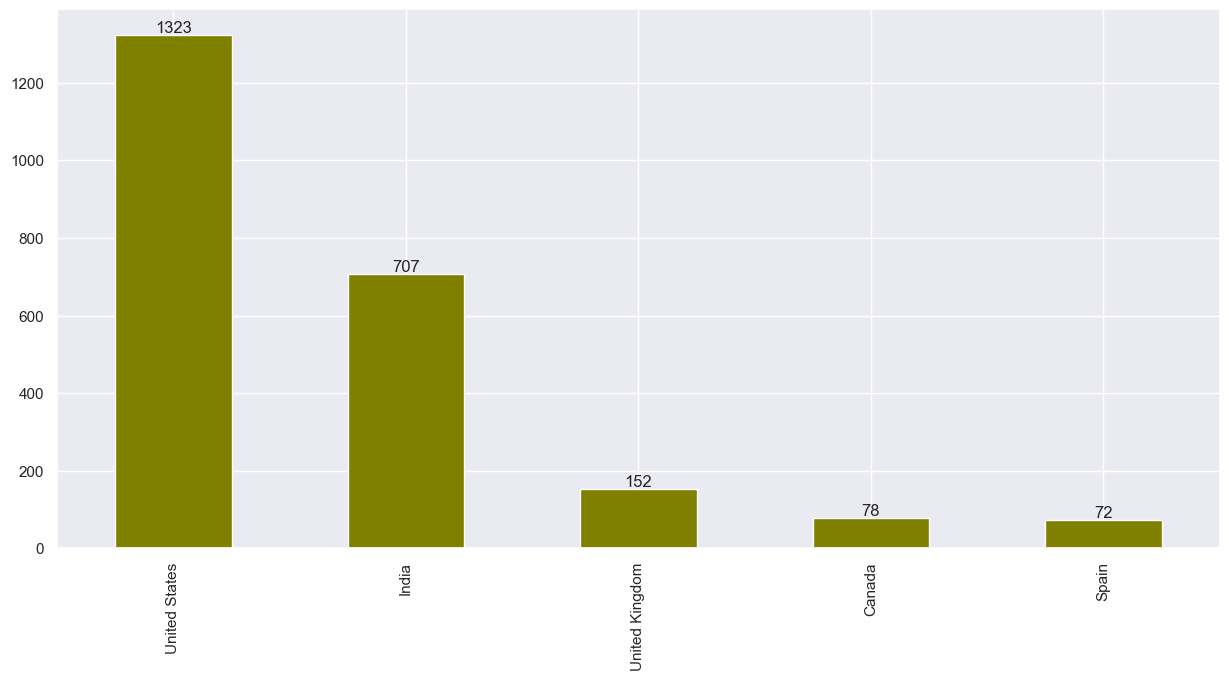

In [125]:
q= p.plot(kind='bar' , color='olive')
for bars in q.containers:
    q.bar_label(bars)